In [1]:
import os
import ast
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import tensorflow as tf
import pickle
import random
# from tensorflow.contrib import lite
from keras.utils import to_categorical, plot_model, np_utils
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout
from keras.regularizers import l1, l2, l1_l2
from keras.models import load_model, Sequential
from keras import backend as K
from random import randrange
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, LabelBinarizer
from bar import RBFLayer, InitCentersKMeans
# %matplotlib notebook

c:\users\cesar\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\cesar\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\cesar\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\cesar\appd

In [2]:
directory = 'dados_palma'
letras = os.listdir(directory) 
num_letras = len(letras)

dataset = pd.DataFrame()

files = {}
for letra in letras:
    files[letra] = os.listdir(directory+'/'+letra)

stats = []
all_dataframe = {}
    
# formated_dict = {}
for letra, value_list in files.items():
#     formated_dict[letra] = []
    for f in value_list:
        with open(directory+"/"+letra+"/"+f) as file:
            lines = [line.strip() for line in file]
            lines = ast.literal_eval(lines[0])
            test = pd.DataFrame(lines)
            d = {'media':test.mean(), 'desvio_padrao': test.std(), 'max': test.max(), 'min': test.min()}

            stats.append(pd.DataFrame(d))
            test['label'] = letra
            dataset = dataset.append(test, ignore_index = True)
            
            if letra not in all_dataframe:
                all_dataframe[letra] = []
            all_dataframe[letra].append(test)

In [3]:
X = dataset.iloc[:,0:30] 
y = dataset.iloc[:,30] 

y = LabelEncoder().fit_transform(y)

X = X/16384
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.5, random_state = 0)
X_test, X_val, y_test, y_val = train_test_split(X_val, y_val, test_size = 0.5, random_state = 0)

# Tranform training labels to one-hot encoding
y_train = np_utils.to_categorical(y_train, num_letras)

# Tranform test labels to one-hot encoding
y_val = np_utils.to_categorical(y_val, num_letras)
y_test = np_utils.to_categorical(y_test, num_letras)

In [10]:
model = Sequential()

classes = num_letras
# hidden_layers = 0
# neurons = [25] * hidden_layers
neurons = 5
epochs = 100

# Camada de entrada
model.add(Dense(units=neurons, activation='sigmoid', input_dim=30))

# model.add(Dropout(0.2))
# Camadas escondidas
# for i in range(hidden_layers):
#     model.add(Dense(units=neurons[i], activation='sigmoid'))

# Camada de saída\
model.add(Dense(units=classes, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=epochs, batch_size = 20, validation_data=(X_val, y_val), verbose=1)
loss, accuracy = model.evaluate(X_val, y_val)

Train on 1000 samples, validate on 500 samples
Epoch 1/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.7181 - acc: 0.5030 - val_loss: 0.6870 - val_acc: 0.5020
Epoch 2/100
1000/1000 [==============================] - 0s 215us/step - loss: 0.6672 - acc: 0.5030 - val_loss: 0.6485 - val_acc: 0.5020
Epoch 3/100
1000/1000 [==============================] - 0s 215us/step - loss: 0.6346 - acc: 0.5280 - val_loss: 0.6207 - val_acc: 0.7400
Epoch 4/100
1000/1000 [==============================] - 0s 222us/step - loss: 0.6064 - acc: 0.7900 - val_loss: 0.5922 - val_acc: 0.8320
Epoch 5/100
1000/1000 [==============================] - 0s 271us/step - loss: 0.5759 - acc: 0.8430 - val_loss: 0.5604 - val_acc: 0.8360
Epoch 6/100
1000/1000 [==============================] - 0s 212us/step - loss: 0.5420 - acc: 0.8490 - val_loss: 0.5258 - val_acc: 0.8440
Epoch 7/100
1000/1000 [==============================] - 0s 230us/step - loss: 0.5052 - acc: 0.8650 - val_loss: 0.4897 - val_acc: 0.8

In [11]:
loss, accuracy = model.evaluate(X_test, y_test)

500/500 [==============================] - 0s 42us/step


In [13]:
loss

0.0011780306324362755

In [7]:
X = dataset.iloc[:,0:30] 
y = dataset.iloc[:,30] 

In [14]:
y

0       palma_dentro
1       palma_dentro
2       palma_dentro
3       palma_dentro
4       palma_dentro
            ...     
1995      palma_fora
1996      palma_fora
1997      palma_fora
1998      palma_fora
1999      palma_fora
Name: label, Length: 2000, dtype: object

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [11]:
pca.explained_variance_ratio_

array([0.45484234, 0.288149  ])

In [16]:
pd.concat([principalDf, y ], axis = 1)

,principal component 1,principal component 2,label
0,-8998.890132,-12200.028649,palma_dentro
1,-8967.179607,-12225.712751,palma_dentro
2,-9155.995994,-12359.126141,palma_dentro
3,-8849.511554,-12242.955599,palma_dentro
4,-8762.886987,-12414.576518,palma_dentro
...,...,...,...
1995,-10554.655991,-12430.172284,palma_fora
1996,-10543.524859,-12389.009115,palma_fora
1997,-10994.126722,-12575.706773,palma_fora
1998,-22721.427746,19510.736421,palma_fora


In [12]:
finalDf = pd.concat([principalDf, y ], axis = 1)

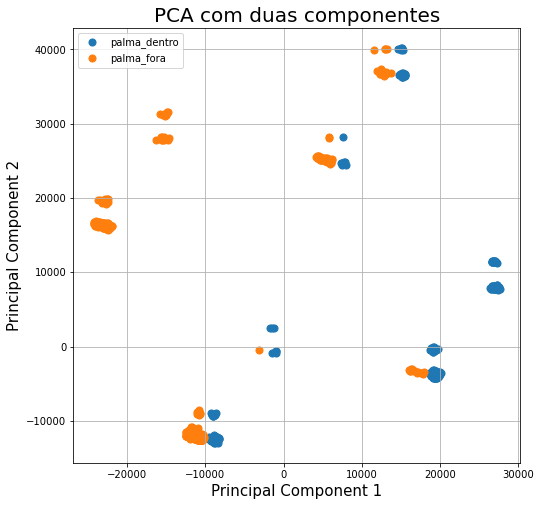

In [18]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA com duas componentes', fontsize = 20)
targets = ["palma_dentro", "palma_fora"]
for target in targets:
    indicesToKeep = (finalDf.iloc[:,2][finalDf.iloc[:,2]==target])
    ax.scatter(finalDf.loc[indicesToKeep.index, 'principal component 1']
               , finalDf.loc[indicesToKeep.index, 'principal component 2']
               , s = 50)
ax.legend(targets, loc="upper left")
ax.grid()

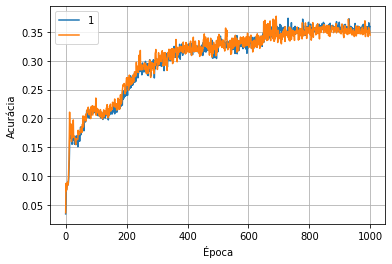

In [3]:
with open('variacao_neuronios/1_history.pickle', 'rb') as fp:
    data = pickle.load(fp)

plt.plot(data['acc'])
plt.plot(data['val_acc'])
    
plt.legend('1 neuronio', loc='best')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.grid()
plt.rcParams['figure.figsize'] = [100, 50]
plt.show()